# Numpy进阶知识补充

## Numpy数组的结构和索引操作

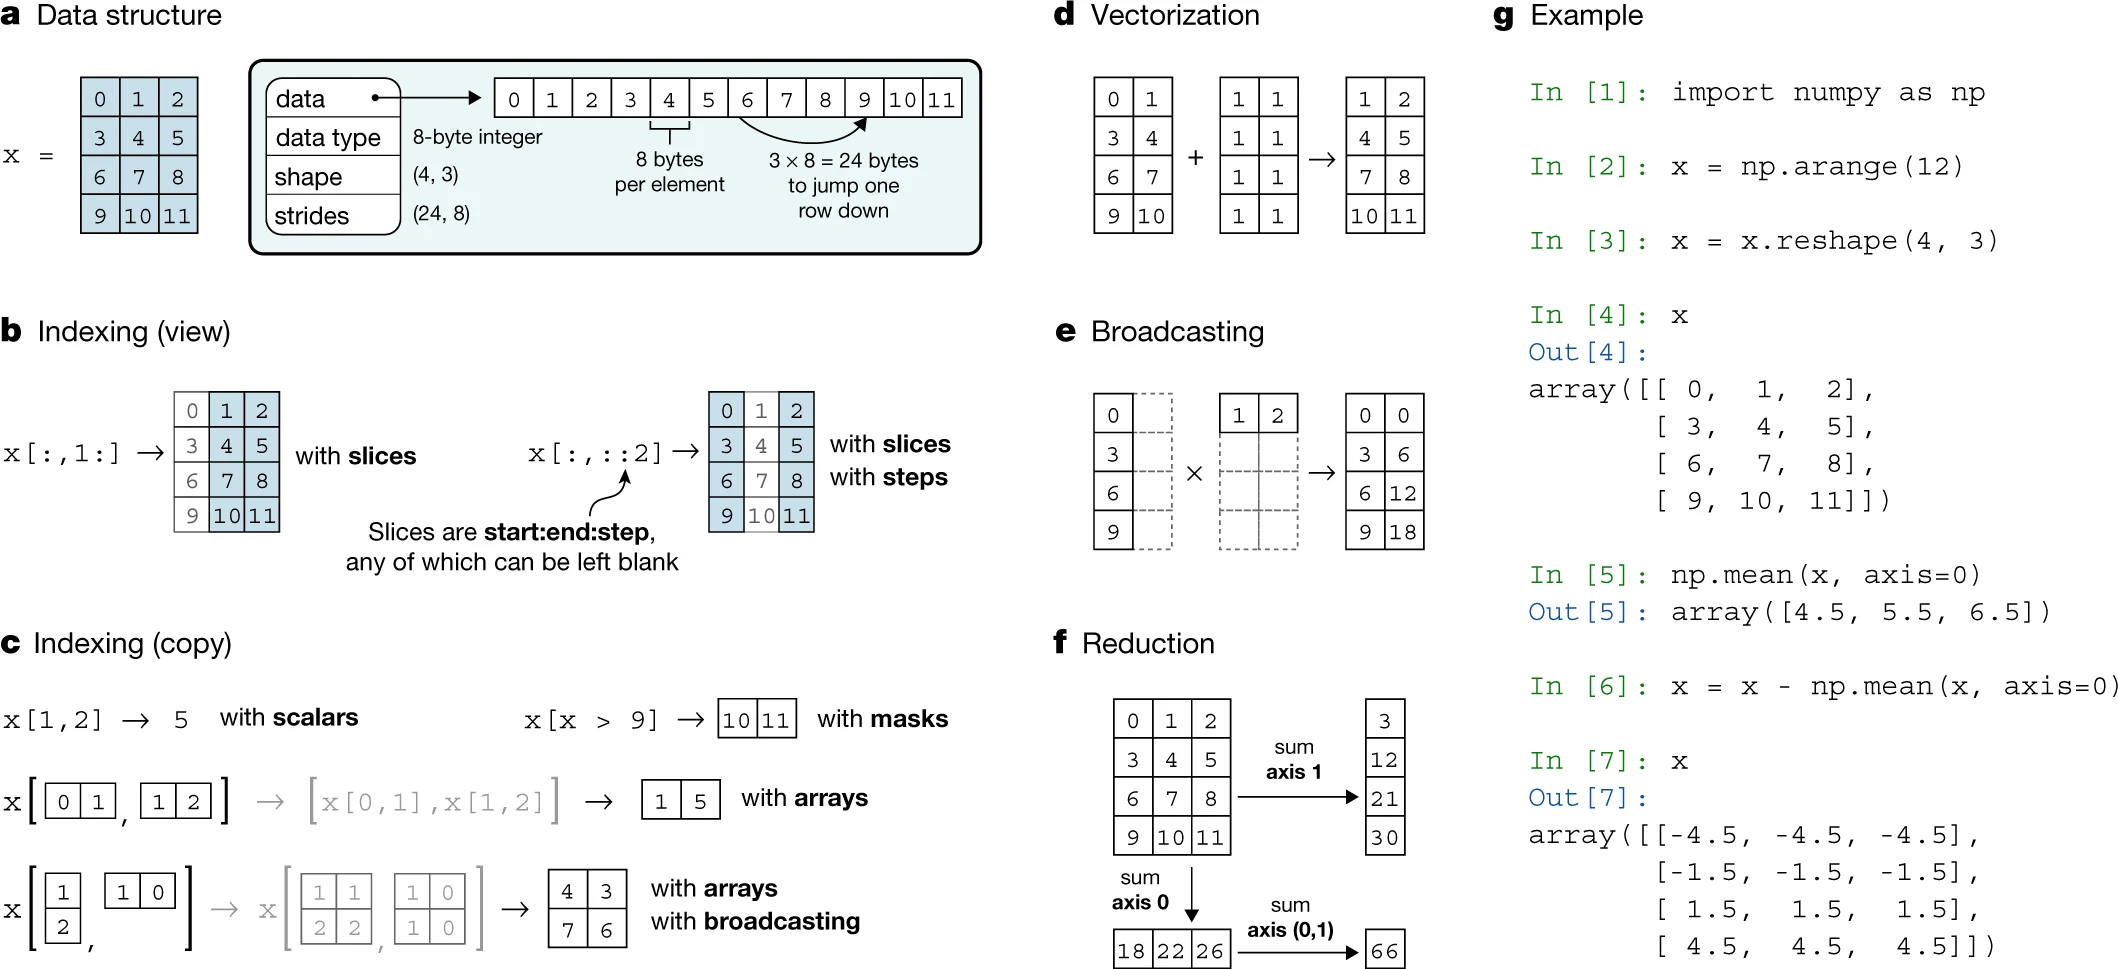!

In [2]:
import numpy as np
# 生成一个与图中x一样的4行3列的二维ndarray
x = np.arange(12).reshape((4,3))
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### 数组的索引

In [3]:
x[:, 1:]

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

In [4]:
x[:, ::2]

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [5]:
# 可以通过更改strides，实现共享原数组在内存中的数据
x[:, ::2].strides

(24, 16)

In [6]:
# 返回view的情况
a = np.arange(12)
b = a.reshape((3,4))
c = a.reshape((4,3))
print(b.strides)
print(c.strides)

b[0,0]=10
print(a)
print(b)
print(c)

(32, 8)
(24, 8)
[10  1  2  3  4  5  6  7  8  9 10 11]
[[10  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[10  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [7]:
x = np.arange(12).reshape((3,4))
d = x.swapaxes(0, 1)
print(d.strides)
print(d)

(8, 32)
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [8]:
# 用ndarray作为索引
# 选定元素
x[[0,1], [1,2]]

array([1, 6])

In [9]:
# 选定行
x[[2,1]]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7]])

In [10]:
# 选定列
x[:, [0, 1]]

array([[0, 1],
       [4, 5],
       [8, 9]])

### 广播（Broadcasting）


In [13]:
print(x[:, [0]], x[[0], 1:3])

[[0]
 [4]
 [8]] [[1 2]]


In [14]:
x[:, [0]] * x[[0], 1:3]

array([[ 0,  0],
       [ 4,  8],
       [ 8, 16]])

### 规约（Reduction)


In [15]:
np.sum(x)

66

In [16]:
np.sum(x, axis=0)

array([12, 15, 18, 21])

In [17]:
np.sum(x, axis=1)

array([ 6, 22, 38])

In [18]:
np.sum(x, axis=(0, 1))

66

### np.dot vs np.matmul

In [19]:
# 矩阵 * 矩阵
a = np.random.randn(3,3)
b = np.random.randn(3,2)
print(a.dot(b))
print(np.matmul(a, b))

[[-3.72757731  1.88557592]
 [-2.17312183  0.07450676]
 [ 0.6289778   0.06096487]]
[[-3.72757731  1.88557592]
 [-2.17312183  0.07450676]
 [ 0.6289778   0.06096487]]


In [20]:
# 矩阵 * 向量
a = np.random.randn(3,3)
b = np.random.randn(3,1)
print(a.dot(b))
print(np.matmul(a, b))

a = np.random.randn(3,3)
b = np.random.randn(3)
print(a.dot(b))
print(np.matmul(a, b))

a = np.random.randn(1,3)
b = np.random.randn(3,3)
print(a.dot(b))
print(np.matmul(a, b))

a = np.random.randn(3)
b = np.random.randn(3,3)
print(a.dot(b))
print(np.matmul(a, b))


[[-4.18536393]
 [ 2.69878136]
 [-1.66541086]]
[[-4.18536393]
 [ 2.69878136]
 [-1.66541086]]
[-1.85447704  1.94385528  0.39853424]
[-1.85447704  1.94385528  0.39853424]
[[-0.71610445  1.93745389  2.80536686]]
[[-0.71610445  1.93745389  2.80536686]]
[-3.12722665 -2.09826625  0.66652606]
[-3.12722665 -2.09826625  0.66652606]


In [21]:
# 不一样的地方
a = np.random.randn(2,3,3)
b = np.random.randn(2,3,1)
d = np.matmul(a, b)
print(d, d.shape)

print(np.matmul(a[0], b[0]))
print(np.matmul(a[1], b[1]))


[[[-1.0029158 ]
  [-0.94272664]
  [-0.61077707]]

 [[ 2.88192207]
  [-0.02759548]
  [-0.60260793]]] (2, 3, 1)
[[-1.0029158 ]
 [-0.94272664]
 [-0.61077707]]
[[ 2.88192207]
 [-0.02759548]
 [-0.60260793]]


In [22]:
c = a.dot(b)
print(c, c.shape)

[[[[-1.0029158 ]
   [-3.1421978 ]]

  [[-0.94272664]
   [-3.11594393]]

  [[-0.61077707]
   [-2.08624777]]]


 [[[ 0.9165338 ]
   [ 2.88192207]]

  [[-0.53503478]
   [-0.02759548]]

  [[-0.1109124 ]
   [-0.60260793]]]] (2, 3, 2, 1)


In [23]:
np.dot?

Docstring:
dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

Parameters
----------
a : array_like
    First argument.
b : array_like
    Second argument.
out : ndarray, optional
    Output argument. This must have the exact kind that would be returned
    if it was not used. In particular, it must have the r